# 2. Exploratory Data Analysis

### 2.1 - First Data Inspection

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
data = "/home/pedrotejero/zrive-ds/data/groceries/box_builder_dataset/feature_frame.csv"
df = pd.read_csv(data)

In [4]:
df.head(10)

,variant_id,product_type,order_id,user_id,created_at,order_date,user_order_seq,outcome,ordered_before,abandoned_before,...,count_children,count_babies,count_pets,people_ex_baby,days_since_purchase_variant_id,avg_days_to_buy_variant_id,std_days_to_buy_variant_id,days_since_purchase_product_type,avg_days_to_buy_product_type,std_days_to_buy_product_type
0,33826472919172,ricepastapulses,2807985930372,3482464092292,2020-10-05 16:46:19,2020-10-05 00:00:00,3,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,33.0,42.0,31.134053,30.0,30.0,24.27618
1,33826472919172,ricepastapulses,2808027644036,3466586718340,2020-10-05 17:59:51,2020-10-05 00:00:00,2,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,33.0,42.0,31.134053,30.0,30.0,24.27618
2,33826472919172,ricepastapulses,2808099078276,3481384026244,2020-10-05 20:08:53,2020-10-05 00:00:00,4,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,33.0,42.0,31.134053,30.0,30.0,24.27618
3,33826472919172,ricepastapulses,2808393957508,3291363377284,2020-10-06 08:57:59,2020-10-06 00:00:00,2,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,33.0,42.0,31.134053,30.0,30.0,24.27618
4,33826472919172,ricepastapulses,2808429314180,3537167515780,2020-10-06 10:37:05,2020-10-06 00:00:00,3,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,33.0,42.0,31.134053,30.0,30.0,24.27618
5,33826472919172,ricepastapulses,2808434524292,3479090790532,2020-10-06 10:50:23,2020-10-06 00:00:00,3,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,33.0,42.0,31.134053,30.0,30.0,24.27618
6,33826472919172,ricepastapulses,2808548917380,3476645445764,2020-10-06 14:23:08,2020-10-06 00:00:00,5,0.0,1.0,0.0,...,0.0,0.0,0.0,2.0,33.0,42.0,31.134053,30.0,30.0,24.27618
7,33826472919172,ricepastapulses,2808549900420,3437017956484,2020-10-06 14:24:26,2020-10-06 00:00:00,13,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,33.0,42.0,31.134053,30.0,30.0,24.27618
8,33826472919172,ricepastapulses,2808673927300,3539005440132,2020-10-06 17:57:23,2020-10-06 00:00:00,2,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,33.0,42.0,31.134053,30.0,30.0,24.27618
9,33826472919172,ricepastapulses,2808728715396,3421126885508,2020-10-06 19:36:06,2020-10-06 00:00:00,2,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,33.0,42.0,31.134053,30.0,30.0,24.27618


In [5]:
df.shape

(2880549, 27)

We have a dataset with 27 variables and more than two millions rows.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2880549 entries, 0 to 2880548
Data columns (total 27 columns):
 #   Column                            Dtype  
---  ------                            -----  
 0   variant_id                        int64  
 1   product_type                      object 
 2   order_id                          int64  
 3   user_id                           int64  
 4   created_at                        object 
 5   order_date                        object 
 6   user_order_seq                    int64  
 7   outcome                           float64
 8   ordered_before                    float64
 9   abandoned_before                  float64
 10  active_snoozed                    float64
 11  set_as_regular                    float64
 12  normalised_price                  float64
 13  discount_pct                      float64
 14  vendor                            object 
 15  global_popularity                 float64
 16  count_adults                      fl

In [7]:
print("Example of a row:")
print("Variables                                    Values")
print("-----------------------------------------------------")
print(df.iloc[0])

Example of a row:
Variables                                    Values
-----------------------------------------------------
variant_id                               33826472919172
product_type                            ricepastapulses
order_id                                  2807985930372
user_id                                   3482464092292
created_at                          2020-10-05 16:46:19
order_date                          2020-10-05 00:00:00
user_order_seq                                        3
outcome                                             0.0
ordered_before                                      0.0
abandoned_before                                    0.0
active_snoozed                                      0.0
set_as_regular                                      0.0
normalised_price                               0.081052
discount_pct                                   0.053512
vendor                                      clearspring
global_popularity                   

We can see two categorical variables: *product_type* and *vendor*

In [8]:
categorical = ["product_type", "vendor"]

There are other features that only indicate the product and order each row refers to. I will call these *info_features*.


In [9]:
info_features = ["variant_id", "order_id", "user_id", "created_at", "order_date"]

In [10]:
numerical = [val for val in df.columns if val not in categorical + info_features]

In [11]:
df[numerical].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2880549 entries, 0 to 2880548
Data columns (total 20 columns):
 #   Column                            Dtype  
---  ------                            -----  
 0   user_order_seq                    int64  
 1   outcome                           float64
 2   ordered_before                    float64
 3   abandoned_before                  float64
 4   active_snoozed                    float64
 5   set_as_regular                    float64
 6   normalised_price                  float64
 7   discount_pct                      float64
 8   global_popularity                 float64
 9   count_adults                      float64
 10  count_children                    float64
 11  count_babies                      float64
 12  count_pets                        float64
 13  people_ex_baby                    float64
 14  days_since_purchase_variant_id    float64
 15  avg_days_to_buy_variant_id        float64
 16  std_days_to_buy_variant_id        fl

In [12]:
df[numerical].describe()

,user_order_seq,outcome,ordered_before,abandoned_before,active_snoozed,set_as_regular,normalised_price,discount_pct,global_popularity,count_adults,count_children,count_babies,count_pets,people_ex_baby,days_since_purchase_variant_id,avg_days_to_buy_variant_id,std_days_to_buy_variant_id,days_since_purchase_product_type,avg_days_to_buy_product_type,std_days_to_buy_product_type
count,2.880549e+06,2.880549e+06,2.880549e+06,2.880549e+06,2.880549e+06,2.880549e+06,2.880549e+06,2.880549e+06,2.880549e+06,2.880549e+06,2.880549e+06,2.880549e+06,2.880549e+06,2.880549e+06,2.880549e+06,2.880549e+06,2.880549e+06,2.880549e+06,2.880549e+06,2.880549e+06
mean,3.289342e+00,1.153669e-02,2.113868e-02,6.092589e-04,2.290188e-03,3.629864e-03,1.272808e-01,1.862744e-01,1.070302e-02,2.017627e+00,5.492182e-02,3.538562e-03,5.134091e-02,2.072549e+00,3.312961e+01,3.523734e+01,2.645304e+01,3.143513e+01,3.088810e+01,2.594969e+01
std,2.140176e+00,1.067876e-01,1.438466e-01,2.467565e-02,4.780109e-02,6.013891e-02,1.268378e-01,1.934480e-01,1.663389e-02,2.098915e-01,3.276586e-01,5.938048e-02,3.013646e-01,3.943659e-01,3.707162e+00,1.057766e+01,7.168323e+00,1.227511e+01,4.330262e+00,3.278860e+00
min,2.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.599349e-02,-4.016064e-02,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,1.414214e+00,0.000000e+00,7.000000e+00,2.828427e+00
25%,2.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.394416e-02,8.462238e-02,1.628664e-03,2.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,3.300000e+01,3.000000e+01,2.319372e+01,3.000000e+01,2.800000e+01,2.427618e+01
50%,3.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,8.105178e-02,1.169176e-01,6.284368e-03,2.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,3.300000e+01,3.400000e+01,2.769305e+01,3.000000e+01,3.100000e+01,2.608188e+01
75%,4.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.352670e-01,2.234637e-01,1.418440e-02,2.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,3.300000e+01,4.000000e+01,3.059484e+01,3.000000e+01,3.400000e+01,2.796118e+01
max,2.100000e+01,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.325301e+00,4.254386e-01,5.000000e+00,3.000000e+00,1.000000e+00,6.000000e+00,5.000000e+00,1.480000e+02,8.400000e+01,5.868986e+01,1.480000e+02,3.950000e+01,3.564191e+01


It is important to highlight that among all the numerical variables, we have 5 that are binary, including the target variable. Therefore, we are dealing with a **binary classification** problem.

In [13]:
target = "outcome"
binary = ["ordered_before", "abandoned_before", "active_snoozed", "set_as_regular"]

### 2.2 Data Quality Assessment

- **Missing Values**

In [14]:
df.isnull().sum()

variant_id                          0
product_type                        0
order_id                            0
user_id                             0
created_at                          0
order_date                          0
user_order_seq                      0
outcome                             0
ordered_before                      0
abandoned_before                    0
active_snoozed                      0
set_as_regular                      0
normalised_price                    0
discount_pct                        0
vendor                              0
global_popularity                   0
count_adults                        0
count_children                      0
count_babies                        0
count_pets                          0
people_ex_baby                      0
days_since_purchase_variant_id      0
avg_days_to_buy_variant_id          0
std_days_to_buy_variant_id          0
days_since_purchase_product_type    0
avg_days_to_buy_product_type        0
std_days_to_

In [15]:
df.isna().sum()

variant_id                          0
product_type                        0
order_id                            0
user_id                             0
created_at                          0
order_date                          0
user_order_seq                      0
outcome                             0
ordered_before                      0
abandoned_before                    0
active_snoozed                      0
set_as_regular                      0
normalised_price                    0
discount_pct                        0
vendor                              0
global_popularity                   0
count_adults                        0
count_children                      0
count_babies                        0
count_pets                          0
people_ex_baby                      0
days_since_purchase_variant_id      0
avg_days_to_buy_variant_id          0
std_days_to_buy_variant_id          0
days_since_purchase_product_type    0
avg_days_to_buy_product_type        0
std_days_to_

- **Duplicates**

In [16]:
df.duplicated(["variant_id", "order_id"]).sum()

0

In [17]:
df.duplicated().sum()

0

- **Inconsistencies**

In [18]:
print(type(df.created_at[0]))
print(type(df.order_date[0]))

<class 'str'>
<class 'str'>


In [19]:
df['order_date'] = pd.to_datetime(df['order_date'])
df['created_at'] = pd.to_datetime(df['created_at'])

In [20]:
df[numerical].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2880549 entries, 0 to 2880548
Data columns (total 20 columns):
 #   Column                            Dtype  
---  ------                            -----  
 0   user_order_seq                    int64  
 1   outcome                           float64
 2   ordered_before                    float64
 3   abandoned_before                  float64
 4   active_snoozed                    float64
 5   set_as_regular                    float64
 6   normalised_price                  float64
 7   discount_pct                      float64
 8   global_popularity                 float64
 9   count_adults                      float64
 10  count_children                    float64
 11  count_babies                      float64
 12  count_pets                        float64
 13  people_ex_baby                    float64
 14  days_since_purchase_variant_id    float64
 15  avg_days_to_buy_variant_id        float64
 16  std_days_to_buy_variant_id        fl

In [21]:
for col in numerical:
    print(f"Column: {col} | Min: {df[col].min()} | Max: {df[col].max()}")

Column: user_order_seq | Min: 2 | Max: 21
Column: outcome | Min: 0.0 | Max: 1.0
Column: ordered_before | Min: 0.0 | Max: 1.0
Column: abandoned_before | Min: 0.0 | Max: 1.0
Column: active_snoozed | Min: 0.0 | Max: 1.0
Column: set_as_regular | Min: 0.0 | Max: 1.0
Column: normalised_price | Min: 0.0159934941718622 | Max: 1.0
Column: discount_pct | Min: -0.0401606425702811 | Max: 1.325301204819277
Column: global_popularity | Min: 0.0 | Max: 0.425438596491228
Column: count_adults | Min: 1.0 | Max: 5.0
Column: count_children | Min: 0.0 | Max: 3.0
Column: count_babies | Min: 0.0 | Max: 1.0
Column: count_pets | Min: 0.0 | Max: 6.0
Column: people_ex_baby | Min: 1.0 | Max: 5.0
Column: days_since_purchase_variant_id | Min: 0.0 | Max: 148.0
Column: avg_days_to_buy_variant_id | Min: 0.0 | Max: 84.0
Column: std_days_to_buy_variant_id | Min: 1.4142135623730951 | Max: 58.68986283848344
Column: days_since_purchase_product_type | Min: 0.0 | Max: 148.0
Column: avg_days_to_buy_product_type | Min: 7.0 | Ma

At first glance, I don't see any clear inconsistencies in the data.

### 2.3 Univariate Analysis

- **Numerical Features**

In [22]:
numerical_without_binary = [val for val in numerical if val not in (binary+[target])]

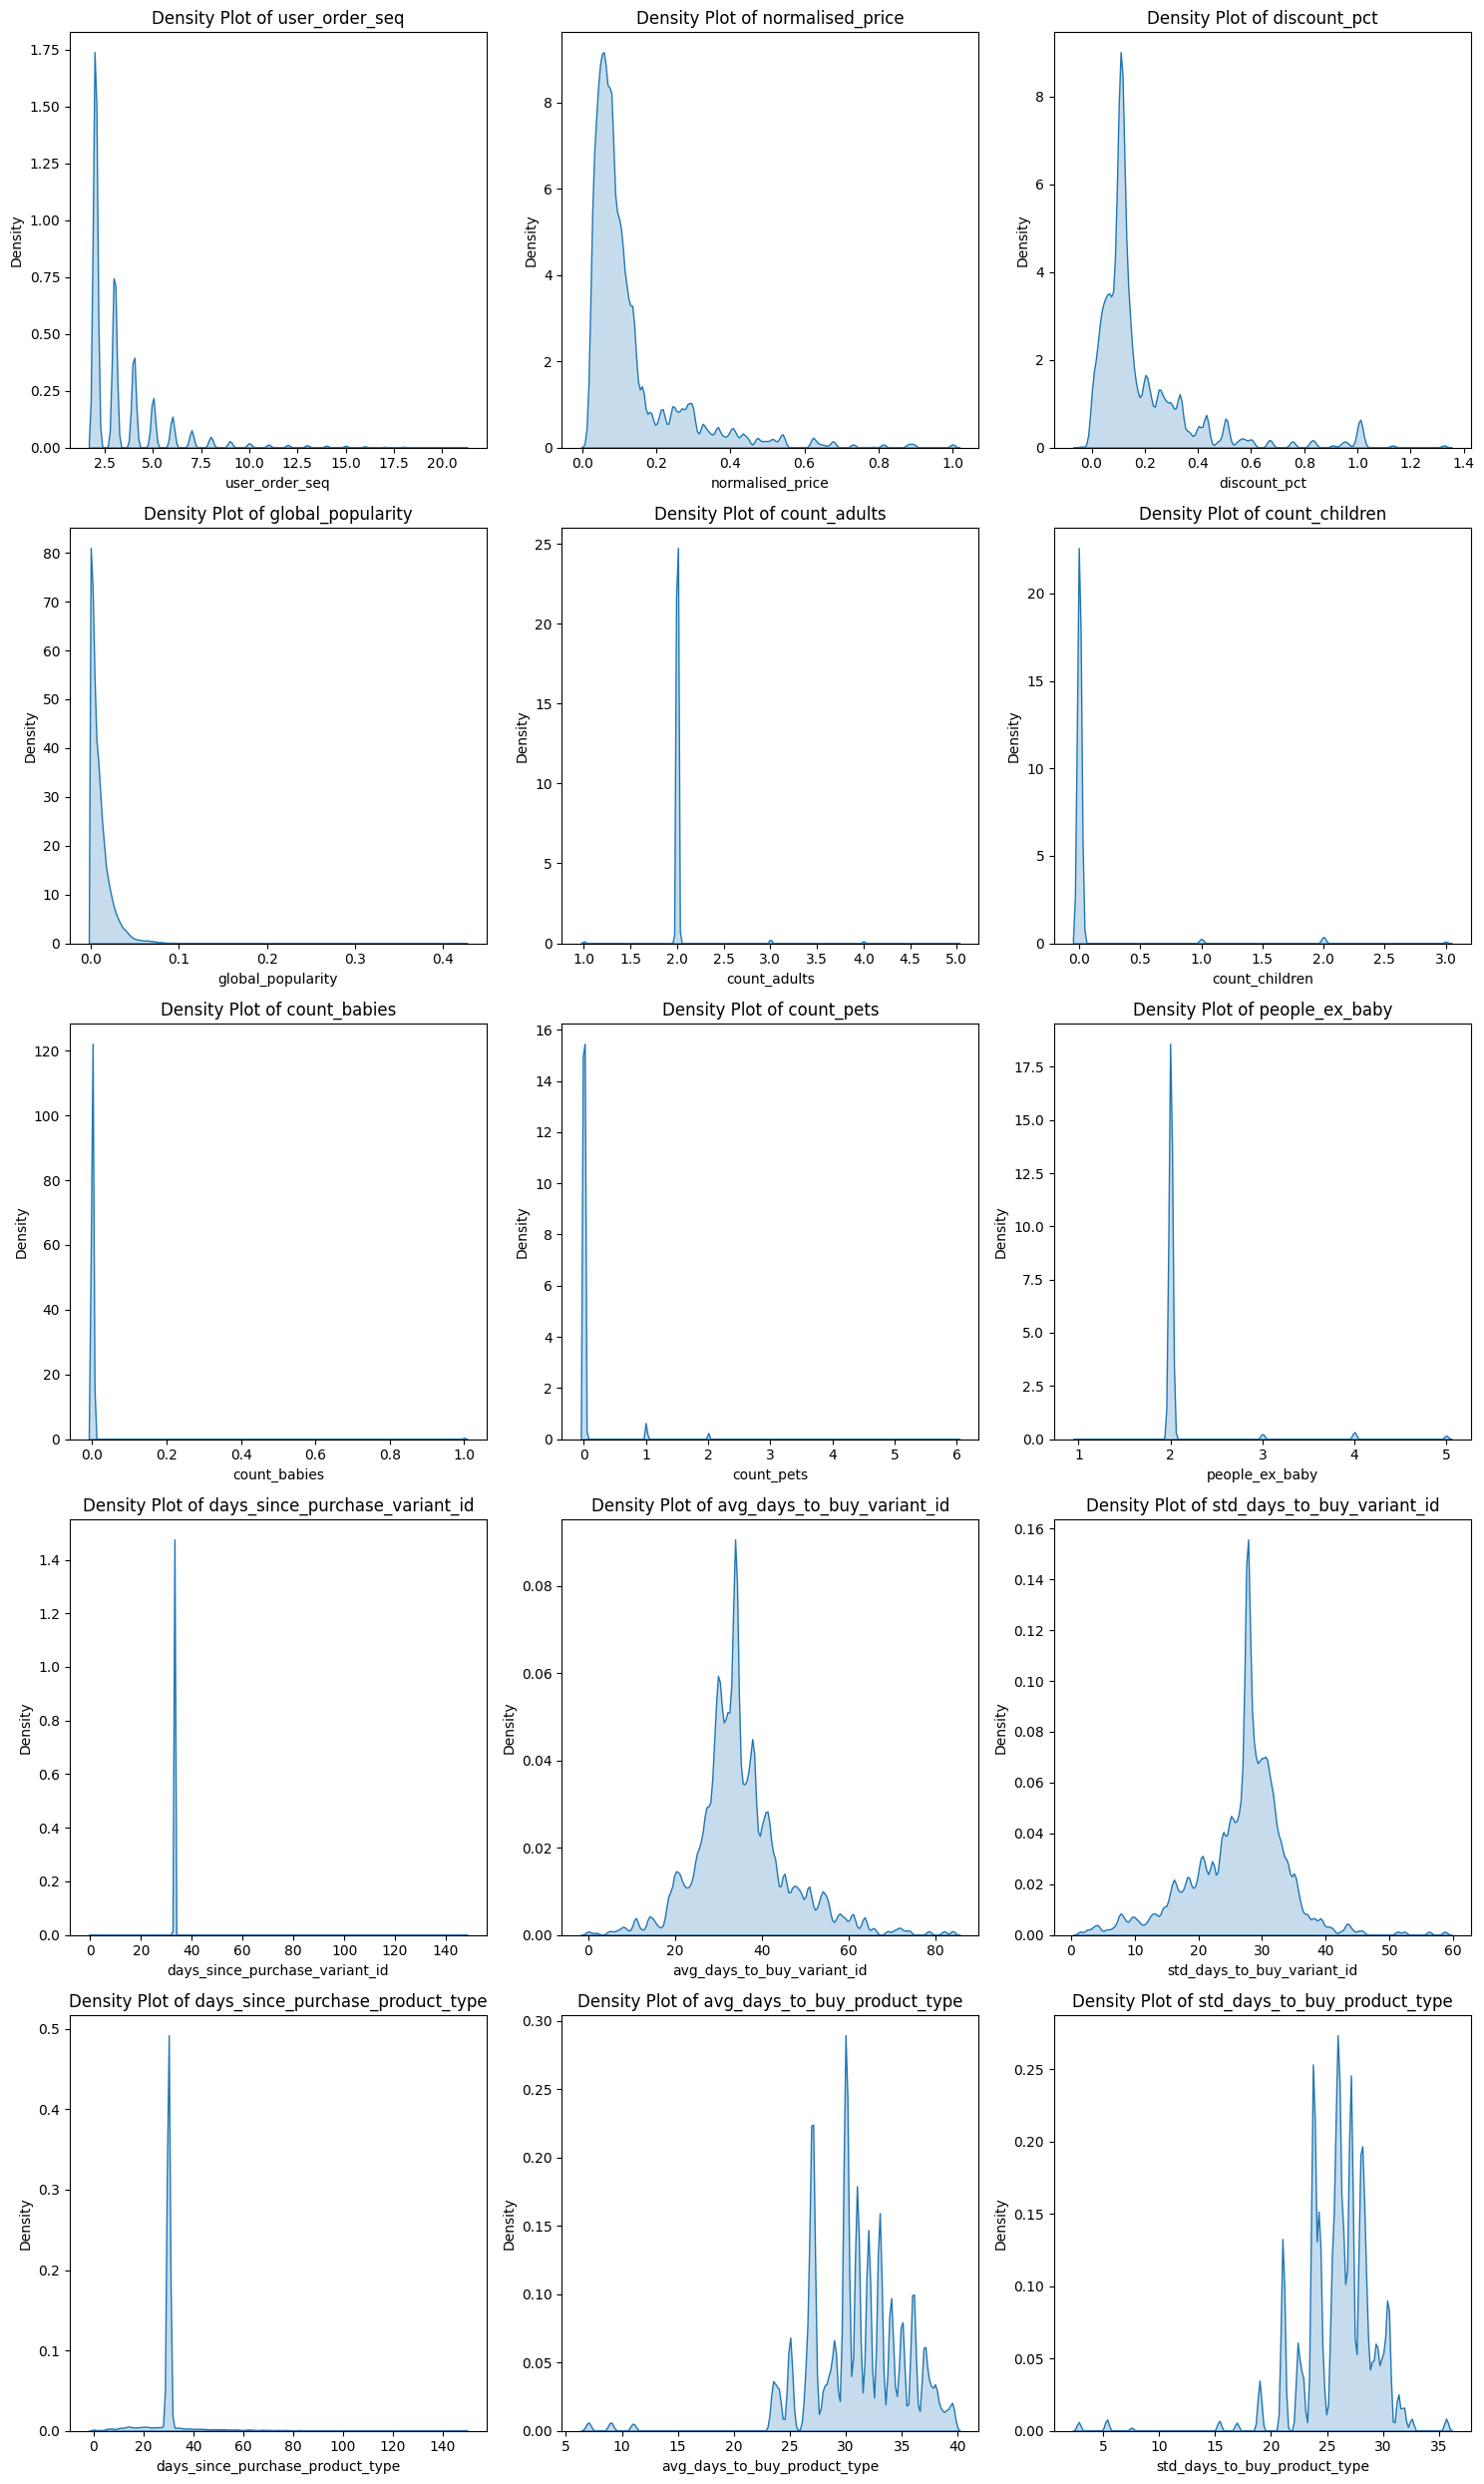

In [23]:
cols = 3
rows = int(np.ceil(len(numerical_without_binary) / cols))

fig, axes = plt.subplots(rows, cols, figsize=(15, 5 * rows))
for i, col in enumerate(numerical_without_binary):
    ax = axes[i // cols, i % cols]
    sns.kdeplot(df[col], ax=ax, fill=True)
    ax.set_title(f"Density Plot of {col}")
    ax.set_xlabel(col)
    ax.set_ylabel("Density")
plt.tight_layout()
plt.show()

The large spikes that appear in the distributions could be due to the imputation of missing values.

- **Binary Variables**

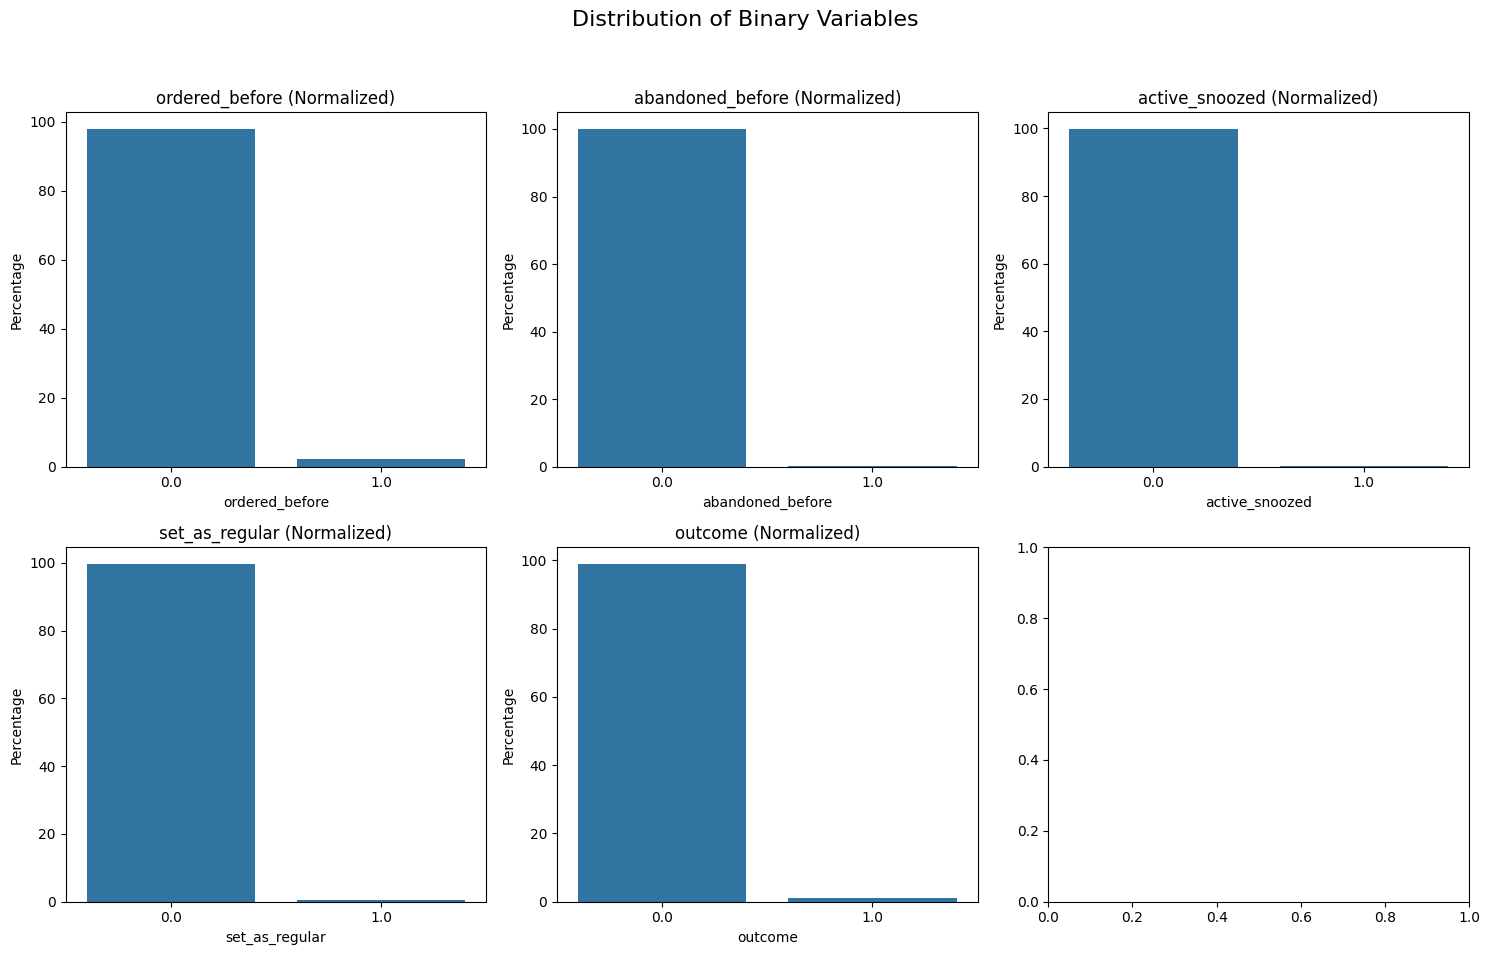

In [31]:
cols = 3
rows = int(np.ceil((len(binary) + 1) / cols))

fig, axes = plt.subplots(rows, cols, figsize=(15, 5 * rows))
for i, col in enumerate(binary + [target]):
    ax = axes[i // cols, i % cols]
    sns.countplot(x=col, data=df, ax=ax, stat="percent")
    ax.set_title(f"{col} (Normalized)")
    ax.set_xlabel(col)
    ax.set_ylabel("Percentage")
fig.suptitle("Distribution of Binary Variables", fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()



As we can see, binary features are **extremely disbalanced**.

- **Categorical Features**

In [33]:
for col in categorical:
    print(f"Column: {col} | Unique Values: {df[col].nunique()}")
    print(f"Column: {col} | Most Frequent Value: {df[col].mode()[0]} | Count: {df[col].value_counts().max()} | Percentage: {df[col].value_counts(normalize=True).max() * 100:.2f}%")
    print(f"Column: {col} | Least Frequent Value: {df[col].value_counts().idxmin()} | Count: {df[col].value_counts().min()} | Percentage: {df[col].value_counts(normalize=True).min() * 100:.2f}%")
    print("-----------------------------------------------------")

Column: product_type | Unique Values: 62
Column: product_type | Most Frequent Value: tinspackagedfoods | Count: 226474 | Percentage: 7.86%
Column: product_type | Least Frequent Value: premixedcocktails | Count: 2620 | Percentage: 0.09%
-----------------------------------------------------
Column: vendor | Unique Values: 264
Column: vendor | Most Frequent Value: biona | Count: 146828 | Percentage: 5.10%
Column: vendor | Least Frequent Value: vicks | Count: 243 | Percentage: 0.01%
-----------------------------------------------------


We are dealing with two features with high cardinality, so we need to rule out one-hot/dummy encoding methods right away.

### 2.4 Multivariate Analysis

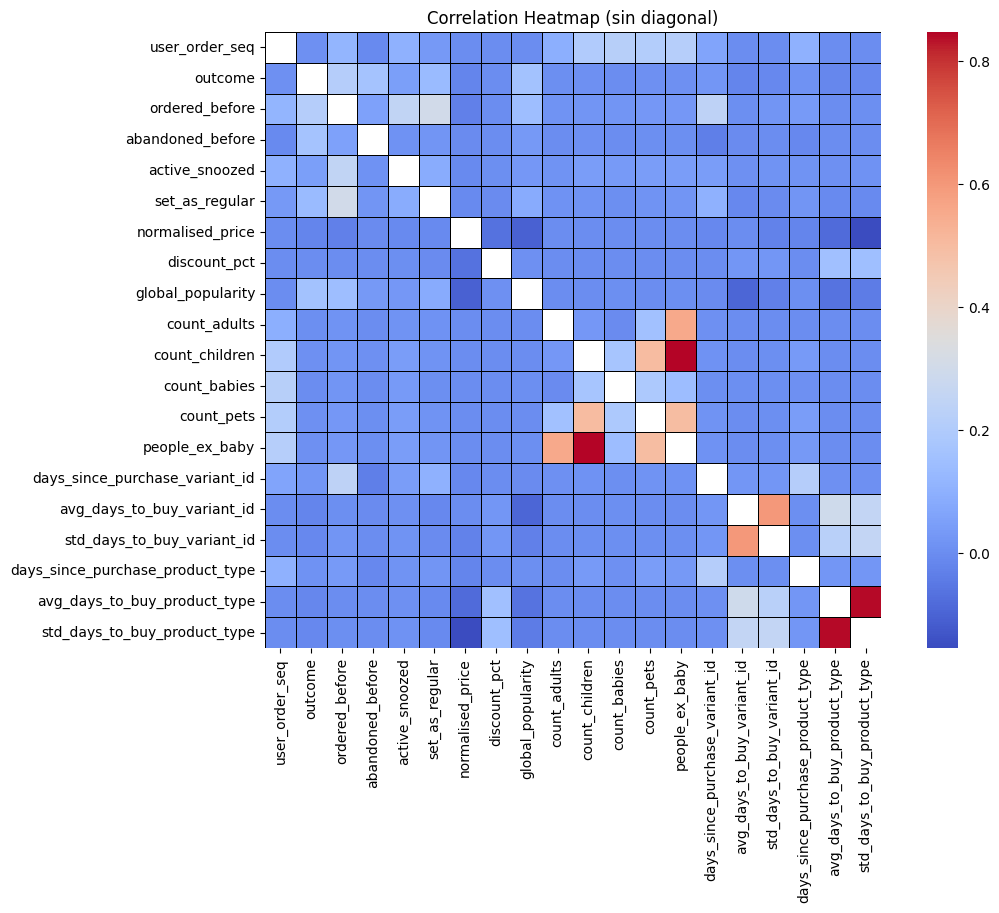

In [ ]:
corr = df[numerical].corr()
mask = np.eye(len(corr), dtype=bool)

plt.figure(figsize=(12, 8))
sns.heatmap(corr, 
            mask=mask,
            cmap="coolwarm", 
            square=True, 
            linewidths=0.5, 
            linecolor='black')
plt.title("Correlation Heatmap (sin diagonal)")
plt.show()


### 2.5 Outlier Detection

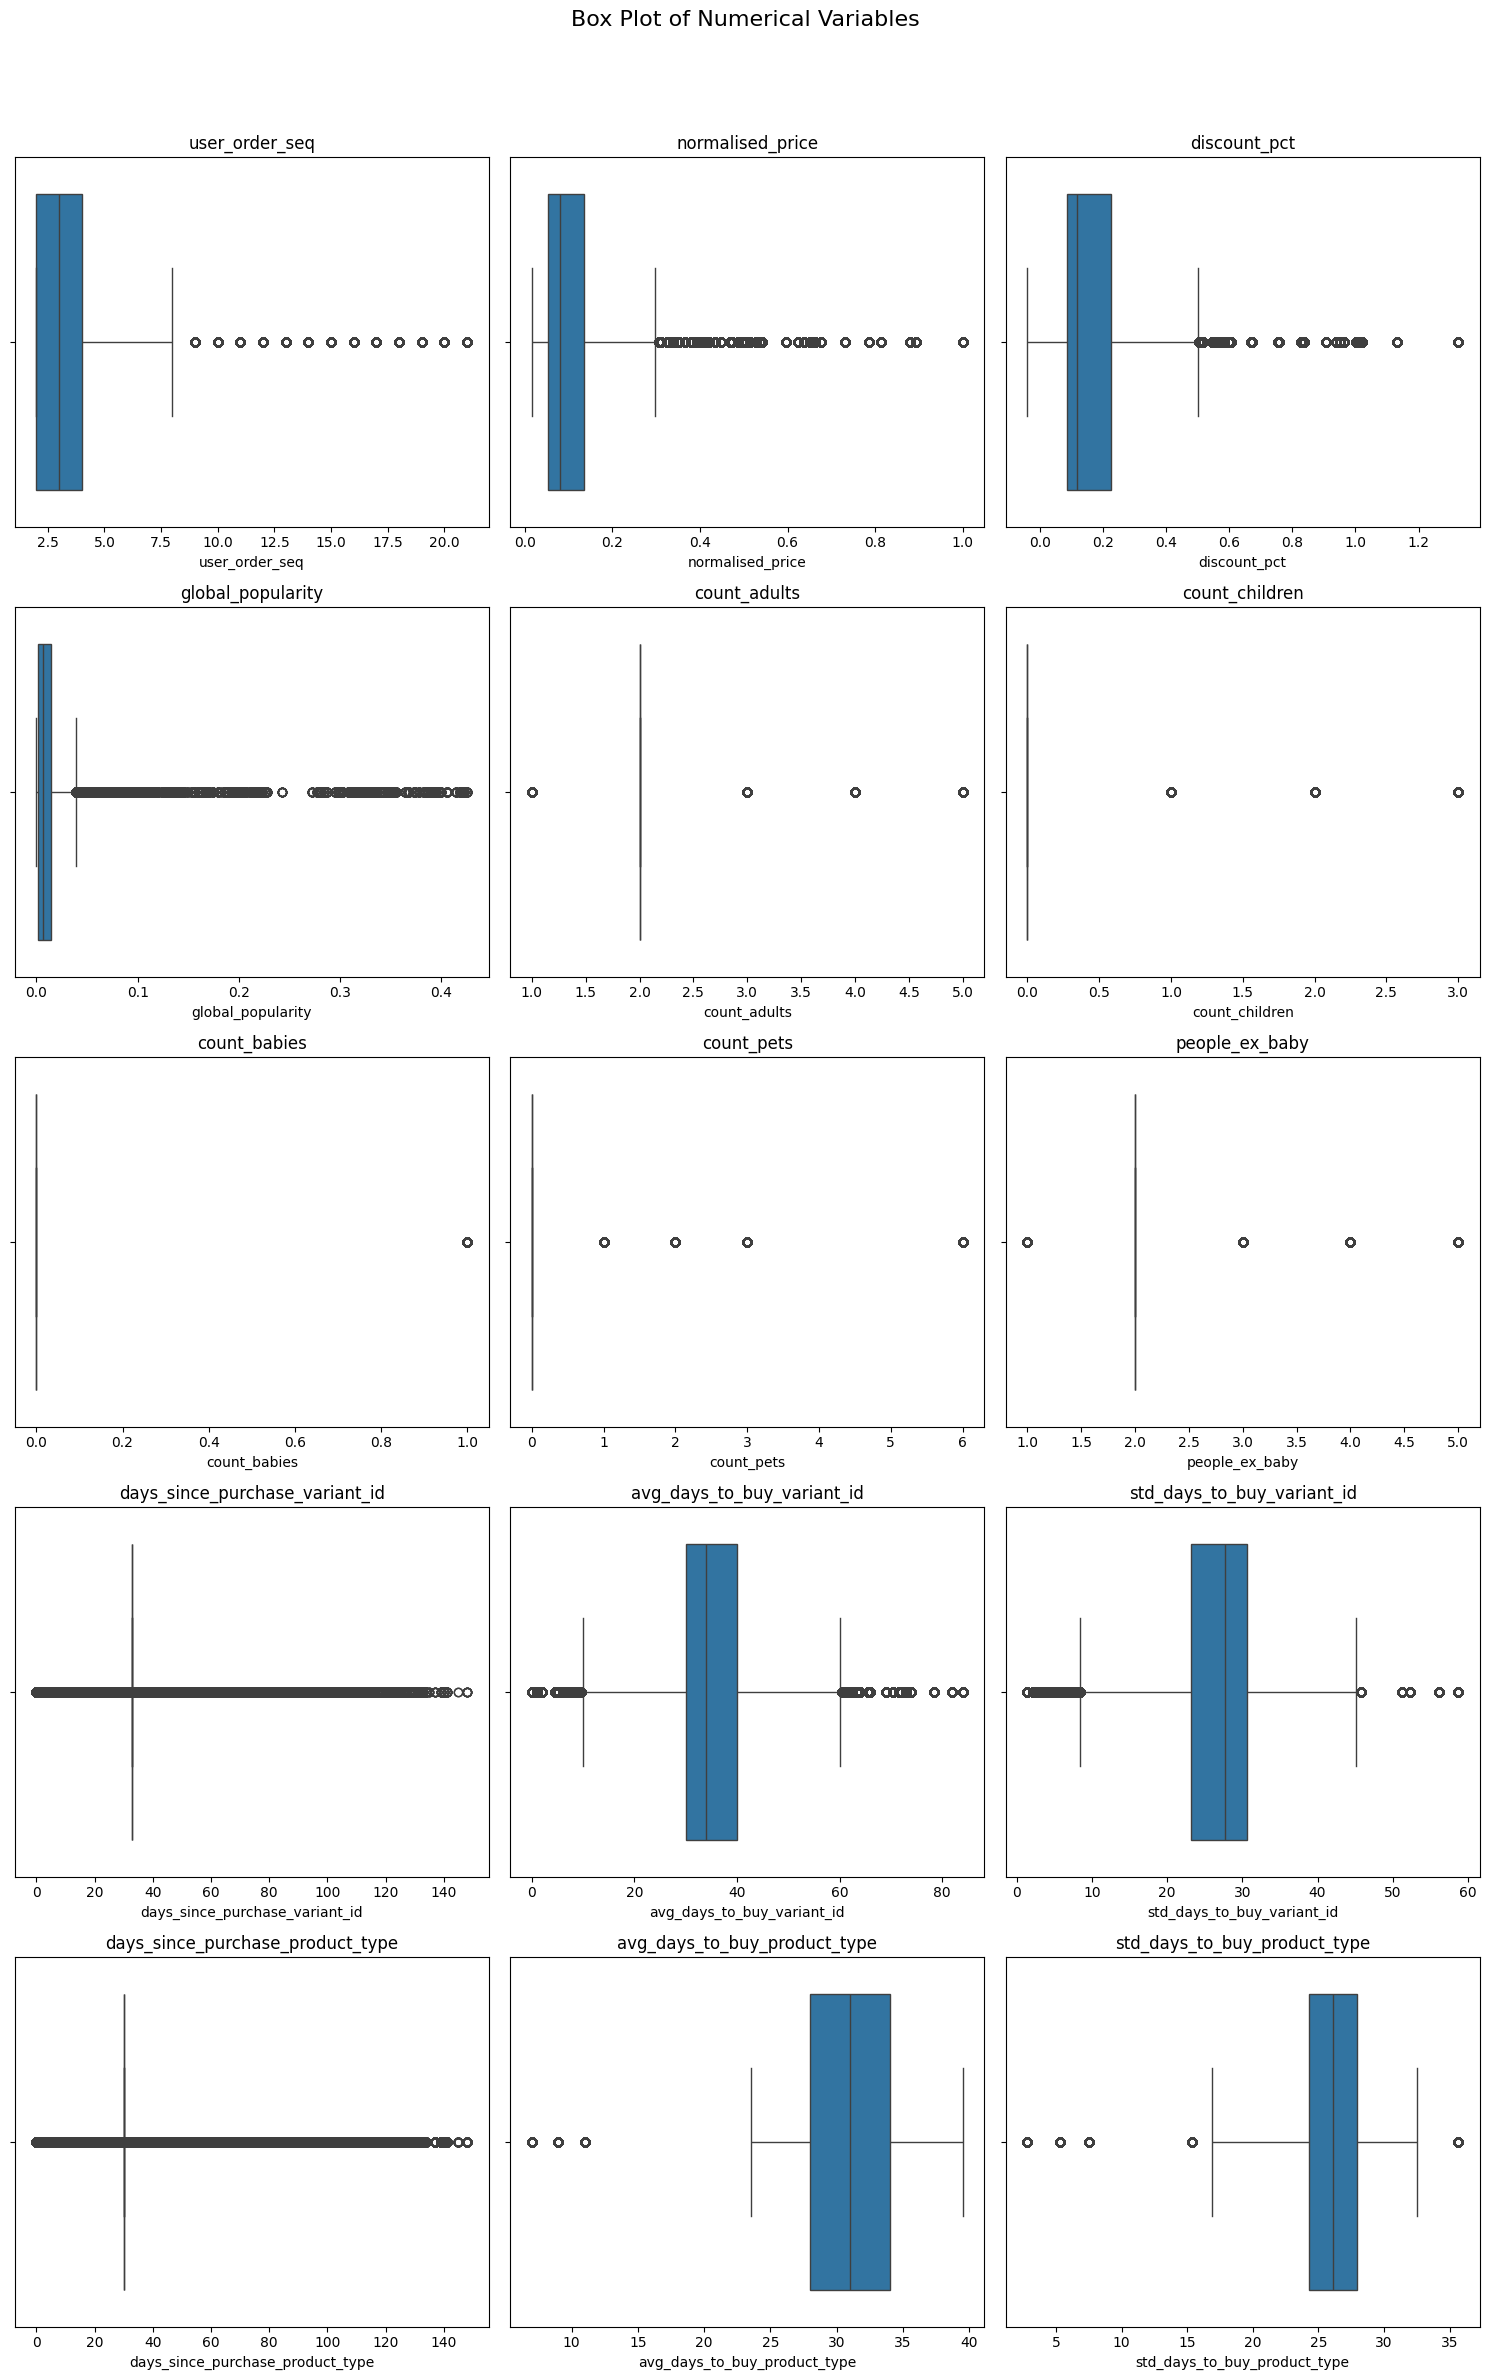

In [45]:
cols = 3
rows = int(np.ceil(len(numerical_without_binary) / cols))

fig, axes = plt.subplots(rows, cols, figsize=(15, 5 * rows))
for i, col in enumerate(numerical_without_binary):
    ax = axes[i // cols, i % cols]
    sns.boxplot(data=df, x=col, ax=ax, whis=2)
    ax.set_title(f"{col}")
    ax.set_xlabel(col)
plt.suptitle("Box Plot of Numerical Variables", fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

#### **Conclusions**
- Widespread presence of outliers → Long tails in the distributions.
- Variables highly left-skewed (values concentrated in low ranges). Ex: user_order_seq, normalised_price
- "count_*" discrete numerical variables → indicate outliers more due to class dispersion than actual anomalies.

In [46]:
!jupyter nbconvert --to markdown "2_eda.ipynb"

[NbConvertApp] Converting notebook 2_eda.ipynb to markdown
[NbConvertApp] Support files will be in 2_eda_files/
[NbConvertApp] Making directory 2_eda_files
[NbConvertApp] Writing 27887 bytes to 2_eda.md
